<a href="https://colab.research.google.com/github/the-black-viper/itemizer/blob/master/Javier_201240542_EE298_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:

# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return pos_encoding



In [3]:
tokens = 16
dimensions = 16
pos_encoding = positional_encoding(tokens, dimensions)
orthogonal = np.dot(pos_encoding[0].T, pos_encoding[0])

In [4]:
U = np.array([[1, 2, 4],[0, 0, 5], [0, 3, 6]])
Z = np.dot(U.T, U)

is_ortho = ()
# print(Z == np.eye(U.shape[0]))
# x = (orthogonal == np.eye(pos_encoding[0].shape[0])).all()
x = (Z == np.eye(U.shape[0])).all()
print(Z)
print(x)


[[ 1  2  4]
 [ 2 13 26]
 [ 4 26 77]]
False


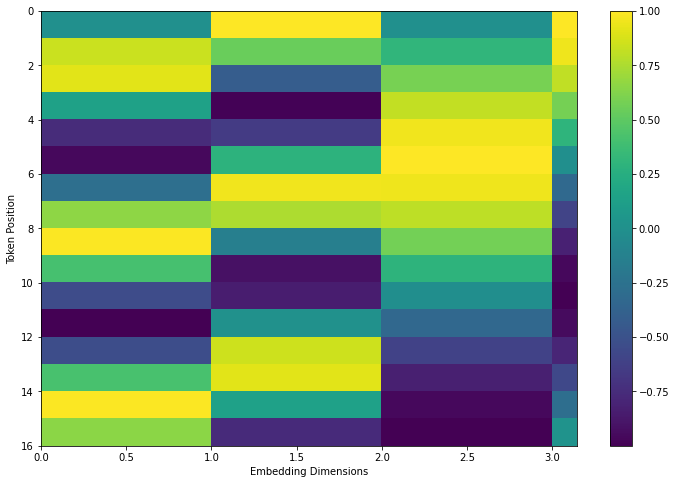

In [5]:

plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, np.pi))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

In [8]:
import numpy as np

def qr_factorization(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]

        for i in range(j - 1):
            q = Q[:, i]
            R[i, j] = q.dot(v)
            v = v - R[i, j] * q

        norm = np.linalg.norm(v)
        Q[:, j] = v / norm
        R[j, j] = norm
    return Q, R

# A = np.random.rand(13, 10) * 1000
v1 = np.array([2,2,1]).reshape(3,1)
v2 = np.array([-2,1,2]).reshape(3,1)
v3 = np.array([18,0,0]).reshape(3,1)
A = np.array((v1,v2,v3)).reshape(3,3)
# A = np.array(([2,1],[2,1],[1,5]))
# A = A.reshape(3,2)
B = A.T
print(A.T)
Q, R = qr_factorization(pos_encoding[0])

Q.shape, R.shape
# np.abs((A - Q.dot(R)).sum()) < 1e-6
# print(np.dot(Q.T,Q).round(2))

[[ 2 -2 18]
 [ 2  1  0]
 [ 1  2  0]]


((16, 16), (16, 16))

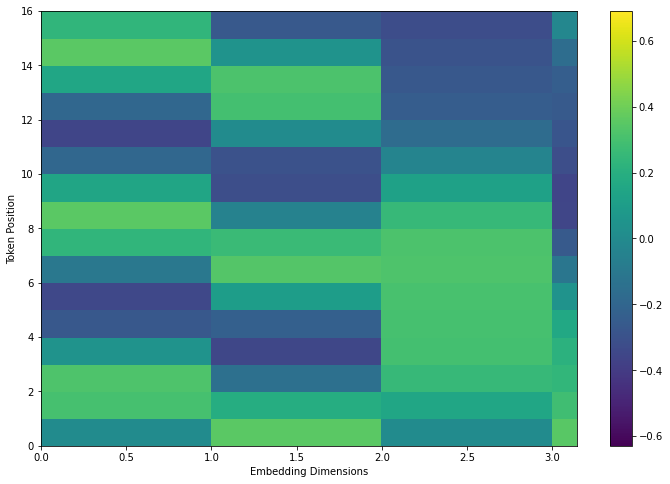

In [10]:
plt.figure(figsize=(12,8))
plt.pcolormesh(Q, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, np.pi))
plt.ylim((0, 16))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()